# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime


from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
weather_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in  enumerate(cities):

    city_url = base_url + "q=" + city + "&appid=" + weather_api_key
    response = requests.get(city_url)
    city_data = response.json()

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city in cities list
    try:
        city_weather = {"City": city,
            "Latitude": city_data["coord"]["lat"],
            "Longitude": city_data["coord"]["lon"],
            "Max Temp": city_data["main"]["temp_max"],
            "Humidity": city_data["main"]["humidity"],
            "Cloudiness": city_data["clouds"]["all"],
            "Wind Speed": city_data["wind"]["speed"],
            "Country": city_data["sys"]["country"],
            "Date": city_data["dt"]}
            
        weather_data.append(city_weather)
    except:
        print("City not found. Skipping...")
    pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port douglas
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | selebi-phikwe
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | richfield
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | san antonio de pale
Processing Record 15 of Set 1 | yuzhno-kurilsk
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | chaihe
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | awjilah
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | isafjo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.count()

City          567
Latitude      567
Longitude     567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port douglas,-16.4833,145.4667,295.72,78,56,4.56,AU,1723075898
1,bilibino,68.0546,166.4372,285.64,44,1,3.51,RU,1723075899
2,selebi-phikwe,-21.9790,27.8498,286.23,76,0,2.12,BW,1723075901
3,iqaluit,63.7506,-68.5145,284.00,58,40,0.00,CA,1723075902
4,waitangi,-43.9535,-176.5597,285.27,77,71,3.58,NZ,1723075903


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port douglas,-16.4833,145.4667,295.72,78,56,4.56,AU,1723075898
1,bilibino,68.0546,166.4372,285.64,44,1,3.51,RU,1723075899
2,selebi-phikwe,-21.9790,27.8498,286.23,76,0,2.12,BW,1723075901
3,iqaluit,63.7506,-68.5145,284.00,58,40,0.00,CA,1723075902
4,waitangi,-43.9535,-176.5597,285.27,77,71,3.58,NZ,1723075903


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

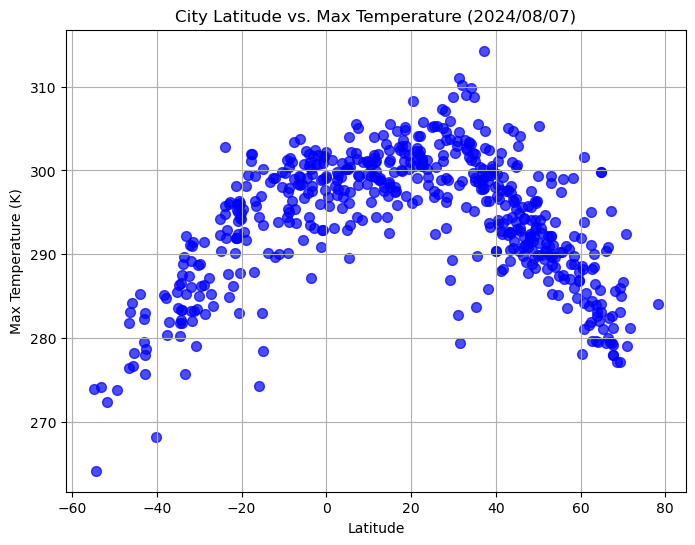

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
today_date = time.strftime('%Y/%m/%d')

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Max Temperature ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")



#### Latitude Vs. Humidity

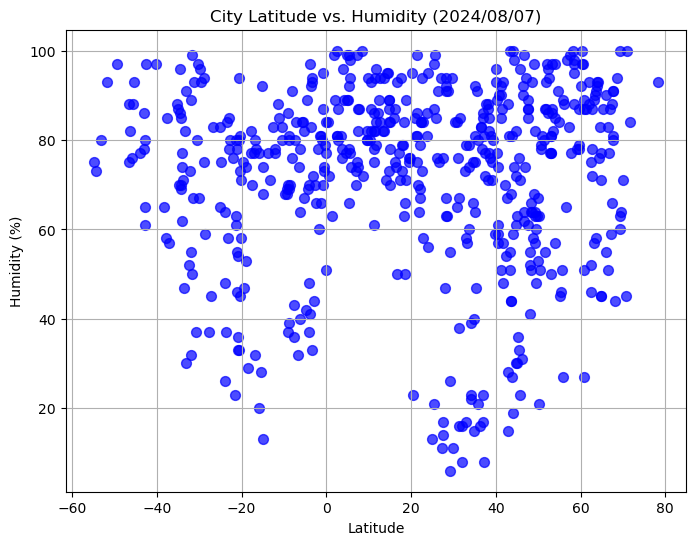

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
# Create scatter plot


plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Humidity ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

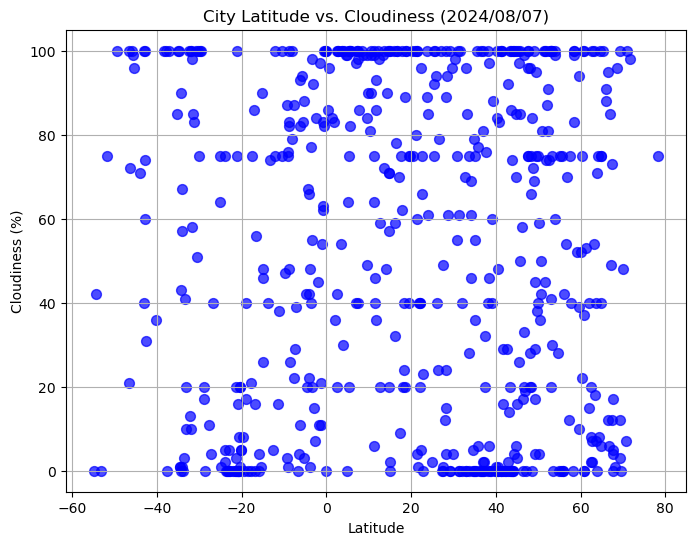

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Cloudiness ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save plot
plt.savefig("output_data/Fig3.png")



#### Latitude vs. Wind Speed Plot

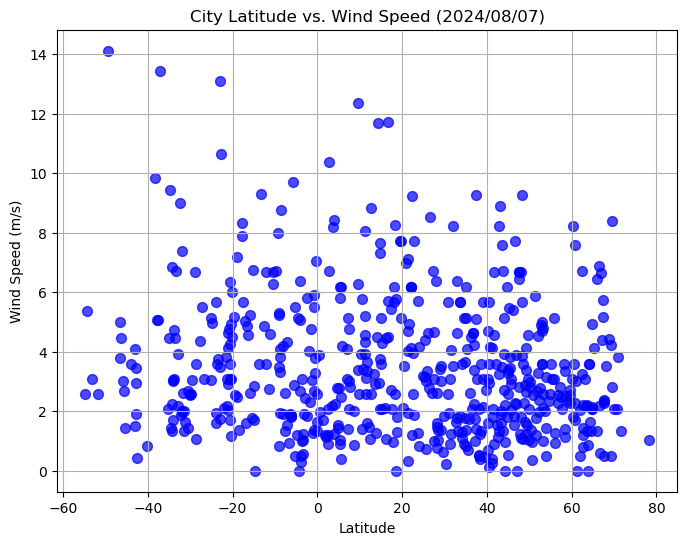

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Wind Speed ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Show grid
plt.grid(True)
# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,285.64,44,1,3.51,RU,1723075899
3,iqaluit,63.7506,-68.5145,284.00,58,40,0.00,CA,1723075902
5,richfield,44.8833,-93.2830,295.36,72,100,2.57,US,1723075906
6,keflavik,64.0049,-22.5624,283.10,93,0,3.60,IS,1723075907
9,bandarbeyla,9.4942,50.8122,298.35,80,49,12.35,SO,1723075911


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port douglas,-16.4833,145.4667,295.72,78,56,4.56,AU,1723075898
2,selebi-phikwe,-21.9790,27.8498,286.23,76,0,2.12,BW,1723075901
4,waitangi,-43.9535,-176.5597,285.27,77,71,3.58,NZ,1723075903
7,kirakira,-10.4544,161.9205,299.86,80,100,6.28,SB,1723075909
8,grytviken,-54.2811,-36.5092,264.19,73,42,5.37,GS,1723075910


###  Temperature vs. Latitude Linear Regression Plot

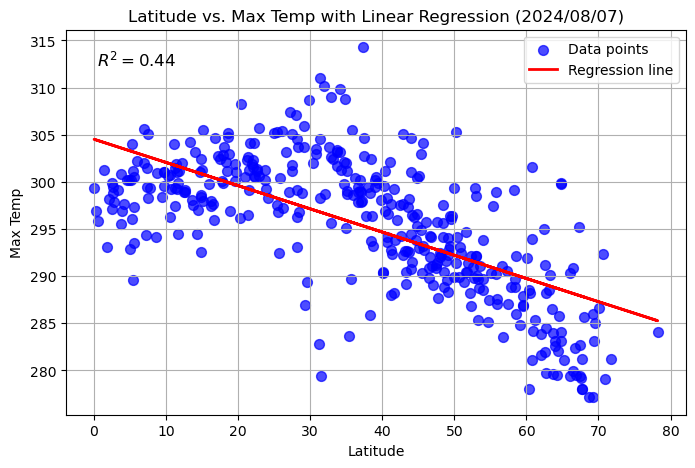

In [34]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(northern_hemi_df, 'Latitude', 'Max Temp')

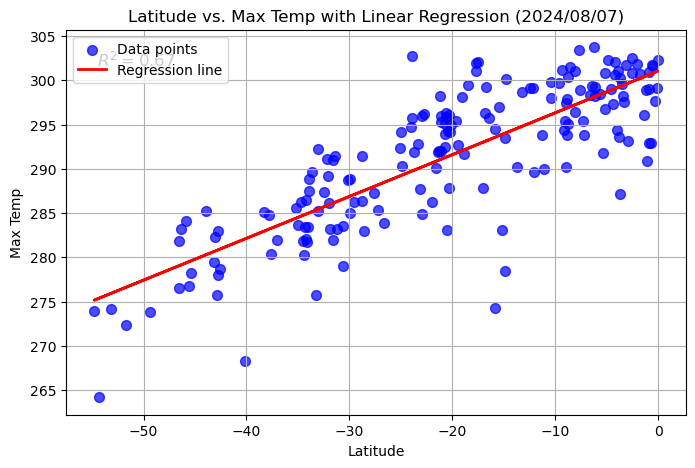

In [41]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(southern_hemi_df, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

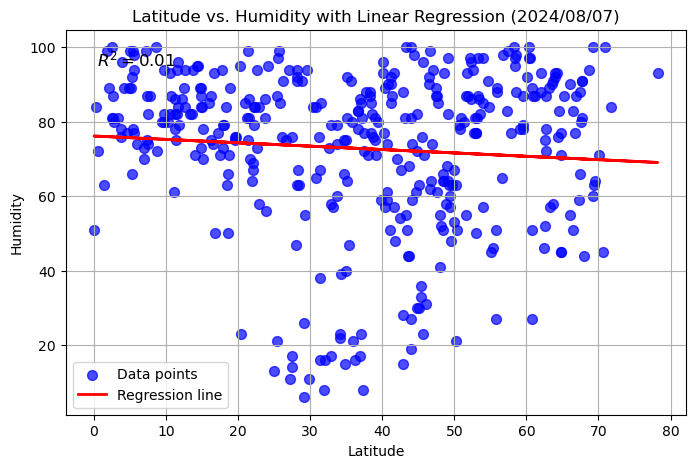

In [35]:
# Northern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(northern_hemi_df, 'Latitude', 'Humidity')

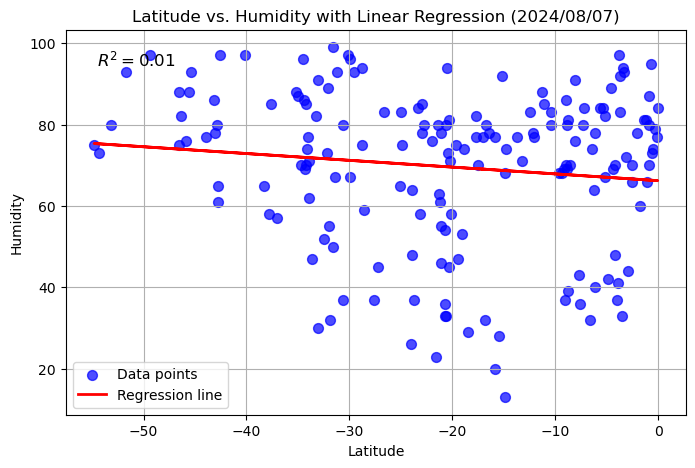

In [40]:
# Southern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(southern_hemi_df, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

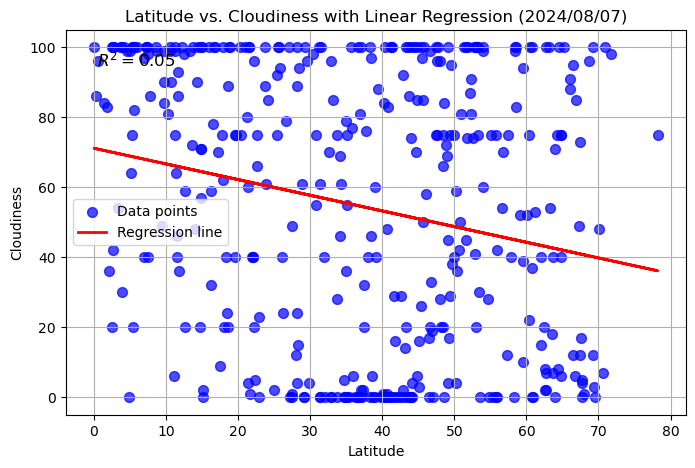

In [36]:
# Northern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(northern_hemi_df, 'Latitude', 'Cloudiness')

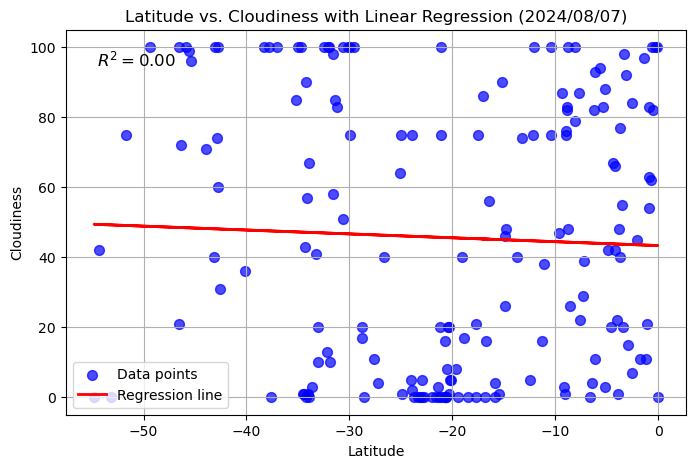

In [39]:
# Southern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(southern_hemi_df, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

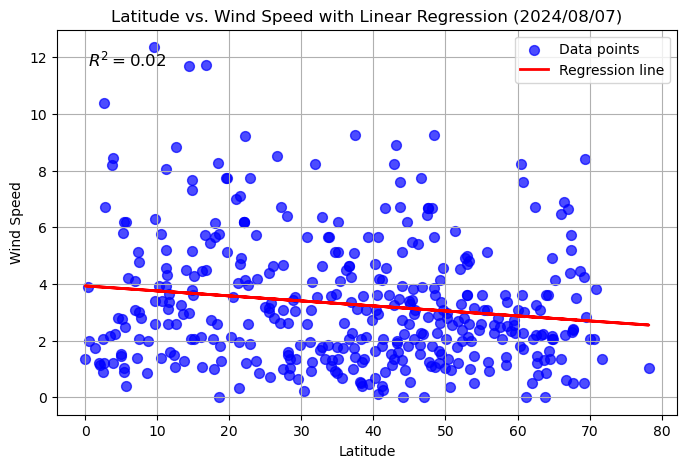

In [37]:
# Northern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(northern_hemi_df, 'Latitude', 'Wind Speed')

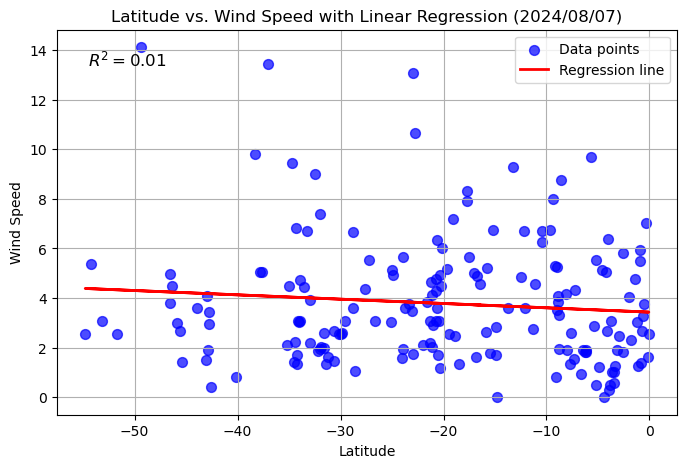

In [38]:
# Southern Hemisphere
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Predict values
    y_pred = slope * X + intercept

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
    plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Display R² value on the plot
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:

plot_linear_regression(southern_hemi_df, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE